In [1]:
#pip install gap-stat

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import pairwise_distances
from gap_statistic import OptimalK

In [3]:
#Readiing the data to a dataframe
Customer_data = pd.read_csv(r"C:\Users\Administrator\Documents\Python Scripts\Untitled Folder\Mall_Customers.csv")
Customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#data description 
data = Customer_data.describe()
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


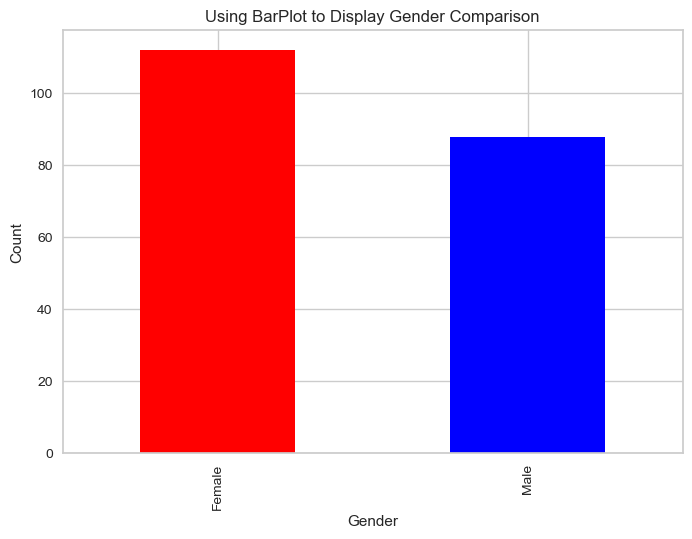

In [5]:
#customer gender visualization 
gender_counts = Customer_data['Gender'].value_counts()

# Plotting the bar chart
gender_counts.plot(kind='bar', color=['red', 'blue'])

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Using BarPlot to Display Gender Comparison')

# Displaying the plot
plt.show()



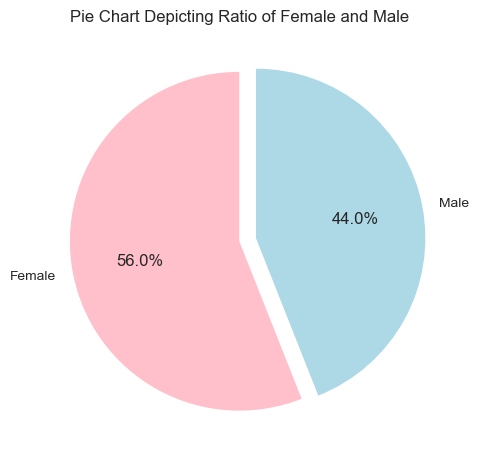

In [6]:
#Ration Between the two genders

# Assuming df is your DataFrame with 'Gender' column
gender_counts = Customer_data['Gender'].value_counts()
pct = round(gender_counts / gender_counts.sum() * 100)

# Plotting the pie chart
fig, ax = plt.subplots()
colors = ['pink', 'lightblue']

# Pie chart parameters
explode = (0, 0.1)
labels = ['Female', 'Male']
ax.pie(gender_counts, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)

# Adding a title
ax.set_title('Pie Chart Depicting Ratio of Female and Male')

# Displaying the plot
plt.show()



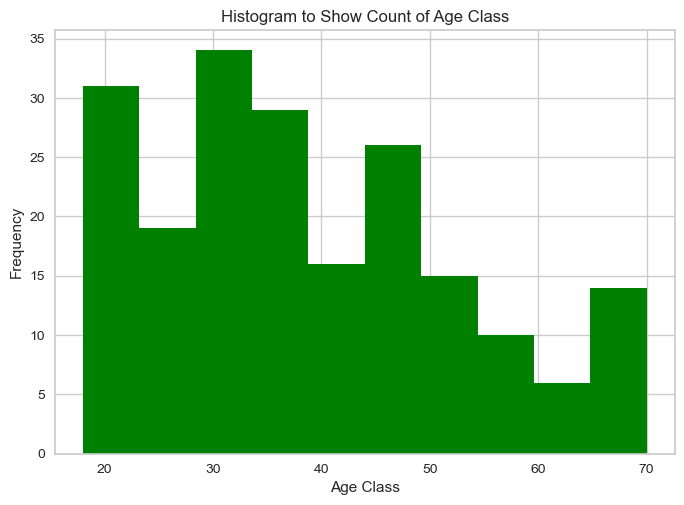

In [7]:
#Visualization of Age Distribution

# Assuming df is your DataFrame with 'Age' column
plt.hist(Customer_data['Age'], color='green', bins=10)  # You can adjust the number of bins as needed

# Adding labels and title
plt.xlabel('Age Class')
plt.ylabel('Frequency')
plt.title('Histogram to Show Count of Age Class')

# Displaying the plot
plt.show()


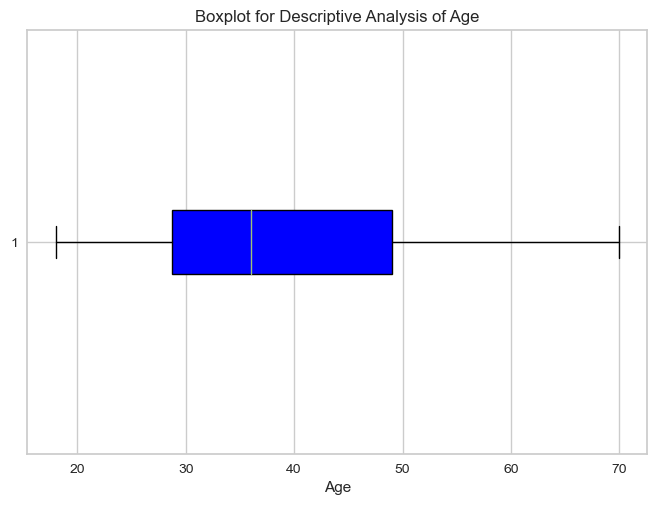

In [8]:
#Descriptive Analysis of Age
# Assuming df is your DataFrame with 'Age' column
plt.boxplot(Customer_data['Age'], vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))

# Adding labels and title
plt.xlabel('Age')
plt.title('Boxplot for Descriptive Analysis of Age')

# Displaying the plot
plt.show()


count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64


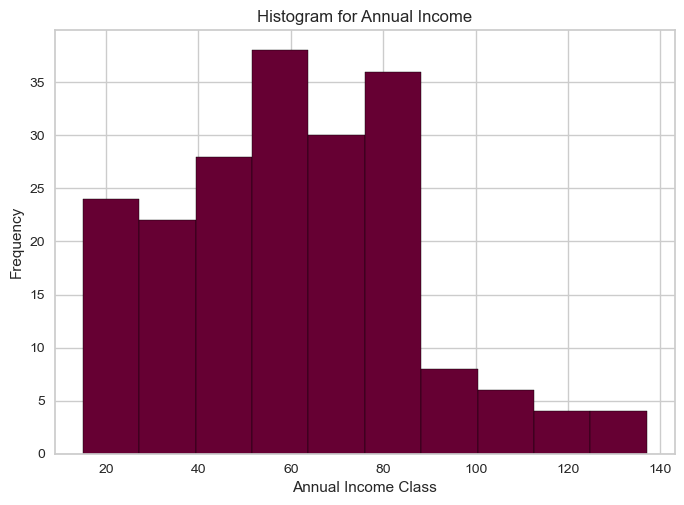

In [9]:
#Analysis of the Annual Income of the Customers

# Assuming df is your DataFrame with 'Annual.Income..k..' column
annual_income = Customer_data['Annual Income (k$)']

# Displaying summary statistics
print(annual_income.describe())

# Creating a histogram
plt.hist(annual_income, color='#660033', edgecolor='black')

# Adding labels and title
plt.xlabel('Annual Income Class')
plt.ylabel('Frequency')
plt.title('Histogram for Annual Income')

# Displaying the plot
plt.show()


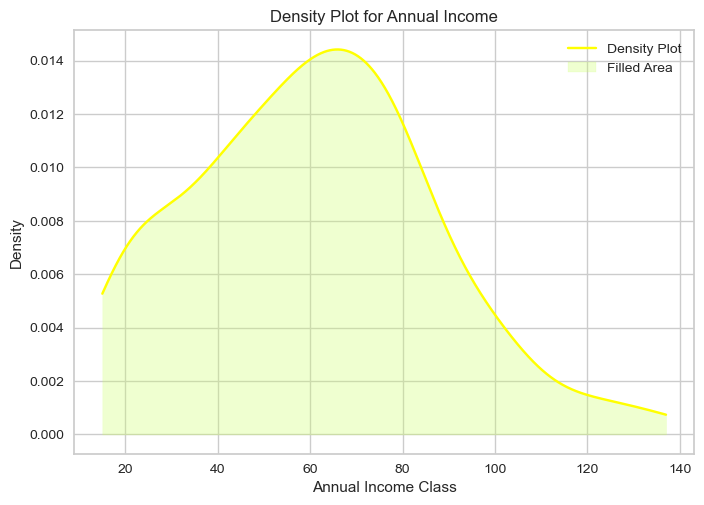

In [10]:
#Density Plot for Annual Income
# Assuming df is your DataFrame with 'Annual.Income..k..' column
annual_income = Customer_data['Annual Income (k$)']

# Creating a density plot
density = gaussian_kde(annual_income)
xs = np.linspace(annual_income.min(), annual_income.max(), 1000)
density_values = density(xs)

# Plotting the density curve
plt.plot(xs, density_values, color='yellow', label='Density Plot')

# Filling the area under the curve with a polygon
plt.fill_between(xs, density_values, color='#ccff66', alpha=0.3, label='Filled Area')

# Adding labels and title
plt.xlabel('Annual Income Class')
plt.ylabel('Density')
plt.title('Density Plot for Annual Income')
plt.legend()

# Displaying the plot
plt.show()


count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64


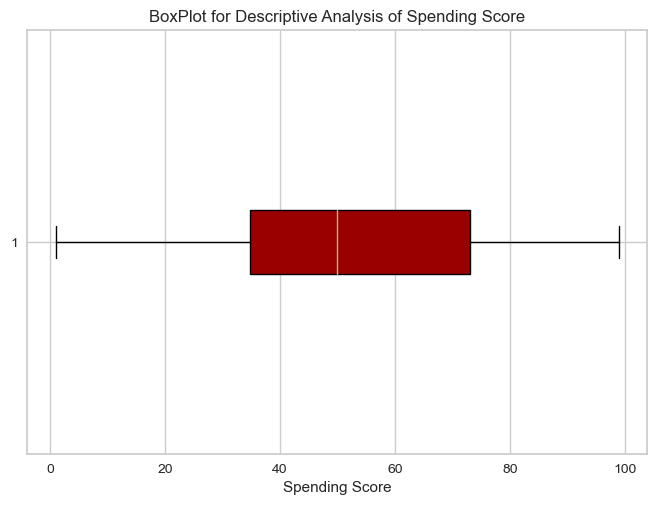

In [11]:
#Analyzing Spending Score of the Customers box plot

# Assuming df is your DataFrame with 'Spending.Score..1.100.' column
spending_score = Customer_data['Spending Score (1-100)']

# Displaying the summary statistics
summary_stats = spending_score.describe()
print(summary_stats)

# Creating a horizontal boxplot
plt.boxplot(spending_score, vert=False, patch_artist=True, boxprops=dict(facecolor='#990000'))
plt.xlabel('Spending Score')
plt.title('BoxPlot for Descriptive Analysis of Spending Score')

# Displaying the plot
plt.show()


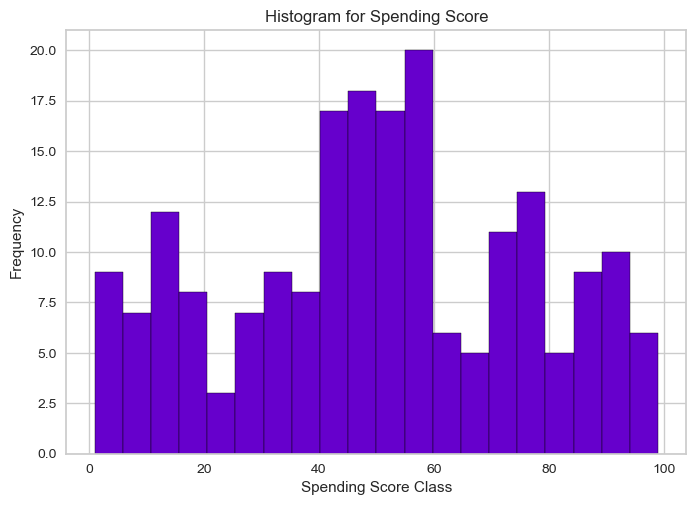

In [12]:
#Analyzing Spending Score of the Customers histogram
# Assuming df is your DataFrame with 'Spending.Score..1.100.' column
spending_score = Customer_data['Spending Score (1-100)']

# Creating a histogram
plt.hist(spending_score, color='#6600cc', edgecolor='black', bins=20)
plt.xlabel('Spending Score Class')
plt.ylabel('Frequency')
plt.title('Histogram for Spending Score')

# Displaying the plot
plt.show()


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Adm

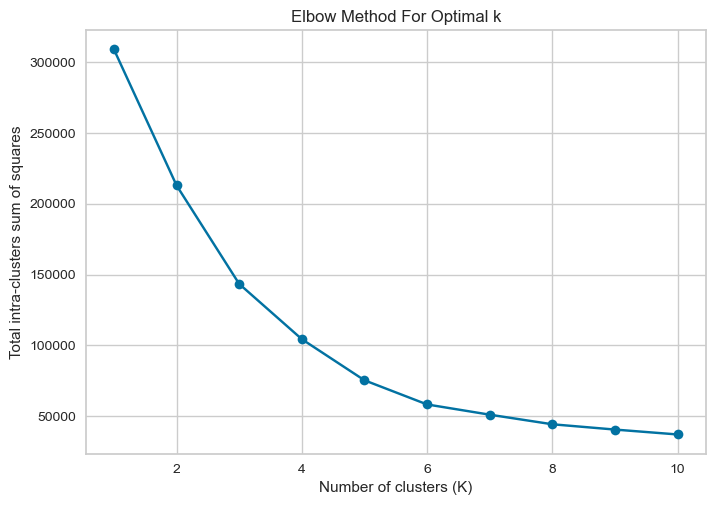

In [13]:
#K-means Algorithm
# Assuming df is your DataFrame with columns 3 to 5
data = Customer_data.iloc[:, 2:5].values

# Function to calculate total intra-cluster sum of square
def calculate_iss(k, data):
    kmeans = KMeans(n_clusters=k, random_state=123, max_iter=100, n_init=100, algorithm='full')
    kmeans.fit(data)
    return kmeans.inertia_

# Generating values for K
k_values = np.arange(1, 11)

# Calculating ISS values
iss_values = [calculate_iss(k, data) for k in k_values]

# Plotting
plt.plot(k_values, iss_values, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Total intra-clusters sum of squares')
plt.show()



C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


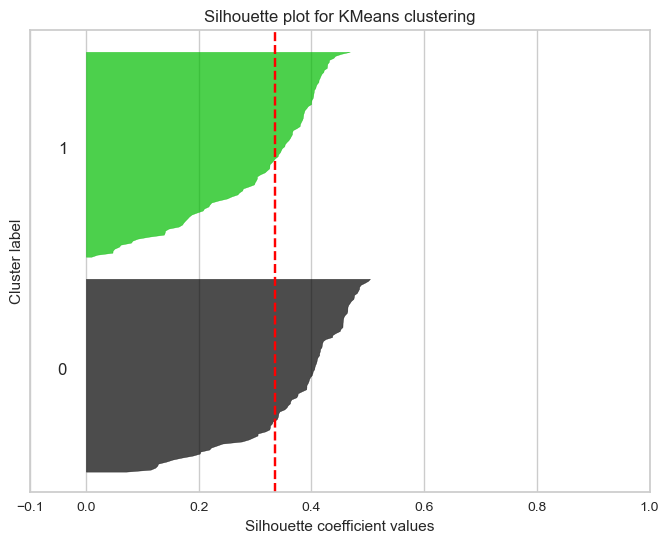

In [14]:
#Average Silhouette Method

# Assuming df is your DataFrame with columns 3 to 5
data = Customer_data.iloc[:, 2:5]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Function to calculate silhouette plot
def plot_silhouette(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=123, max_iter=100, n_init=50, algorithm='full')
    cluster_labels = kmeans.fit_predict(data)

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(data, cluster_labels)
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    # Create a subplot with 1 row and 1 column
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)

    # The silhouette coefficient can range from -1, 1
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    ax.set_title("Silhouette plot for KMeans clustering")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# Call the function with the desired number of clusters
plot_silhouette(data_scaled, n_clusters=2)


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


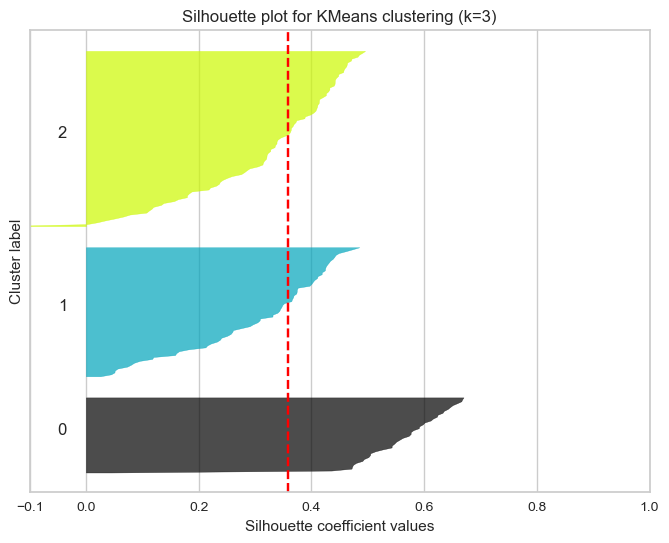

In [15]:

# Assuming df is your DataFrame with columns 3 to 5
data = Customer_data.iloc[:, 2:5]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=123, max_iter=100, n_init=50, algorithm='full')
cluster_labels = kmeans.fit_predict(data_scaled)

# Calculate silhouette scores
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

# Create a subplot with 1 row and 1 column
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

# The silhouette coefficient can range from -1, 1
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(data_scaled) + (3 + 1) * 10])

y_lower = 10

for i in range(3):
    # Aggregate the silhouette scores for samples belonging to cluster i and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 3)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10

ax.set_title("Silhouette plot for KMeans clustering (k=3)")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


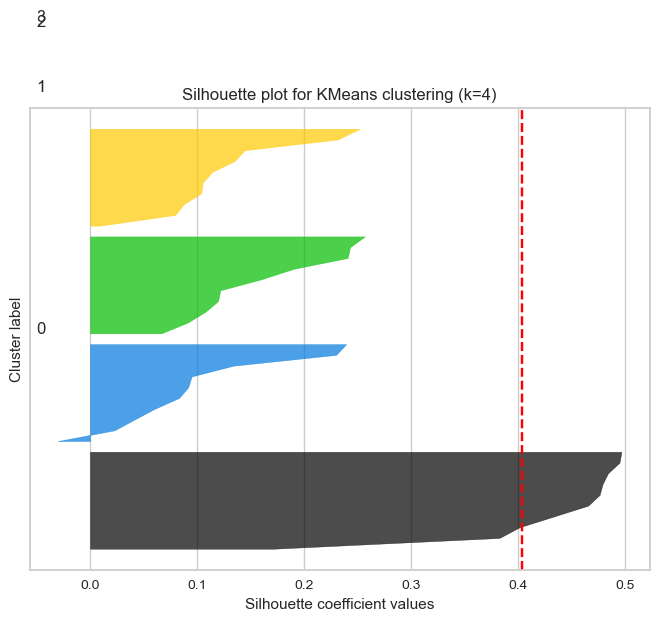

In [16]:
# Assuming df is your DataFrame with columns 3 to 5
data = Customer_data.iloc[:, 2:5]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=123, max_iter=100, n_init=50, algorithm='full')
cluster_labels = kmeans.fit_predict(data_scaled)

# Calculate silhouette scores
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

# Create a silhouette plot
plt.figure(figsize=(8, 6))
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([])  # Clear the y-axis labels / ticks

for i in range(4):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = 10 + (i + 1) * 10
    color = plt.cm.nipy_spectral(float(i) / 4)
    
    plt.fill_betweenx(np.arange(10 + i * 10, y_upper),
                      0, ith_cluster_silhouette_values[:10],  # Adjusted to take the first 10 values
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, 10 + i * 10 + 0.5 * size_cluster_i, str(i))

plt.title("Silhouette plot for KMeans clustering (k=4)")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

plt.show()


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


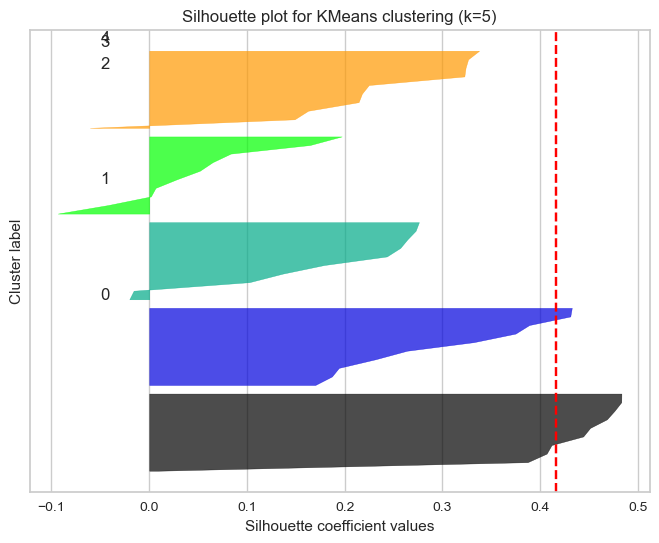

In [17]:
# Assuming df is your DataFrame with columns 3 to 5
data = Customer_data.iloc[:, 2:5]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform k-means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=123, max_iter=100, n_init=50, algorithm='full')
cluster_labels = kmeans.fit_predict(data_scaled)

# Calculate silhouette scores
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

# Create a silhouette plot
plt.figure(figsize=(8, 6))
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([])  # Clear the y-axis labels / ticks

for i in range(5):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = 10 + (i + 1) * 10
    color = plt.cm.nipy_spectral(float(i) / 5)
    
    plt.fill_betweenx(np.arange(10 + i * 10, y_upper),
                      0, ith_cluster_silhouette_values[:10],  # Adjusted to take the first 10 values
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, 10 + i * 10 + 0.5 * size_cluster_i, str(i))

plt.title("Silhouette plot for KMeans clustering (k=5)")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

plt.show()


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on 

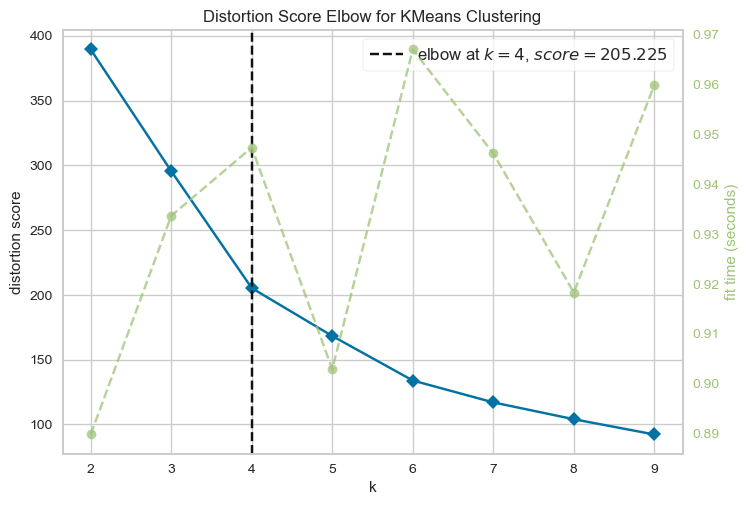

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


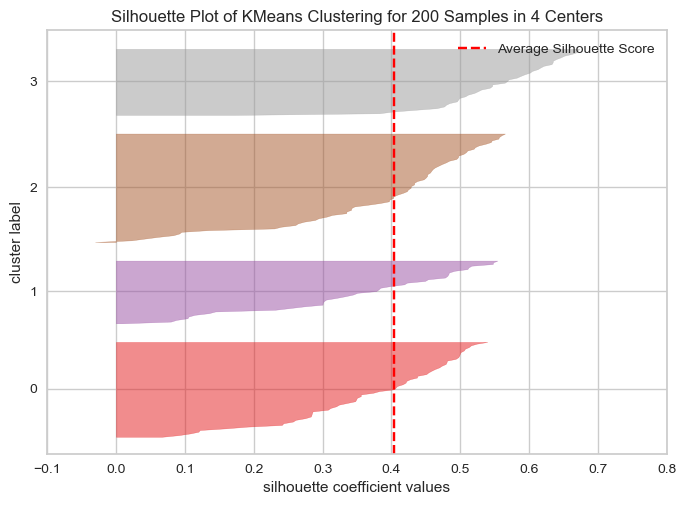

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
#from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Assuming df is your DataFrame with columns 3 to 5
data = Customer_data.iloc[:, 2:5]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Use the elbow method to determine the optimal number of clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data_scaled)
visualizer.show()

# Use silhouette analysis to choose the optimal number of clusters
model = KMeans(n_clusters=visualizer.elbow_value_)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(data_scaled)
visualizer.show()


In [23]:
# Assuming customer_data is your DataFrame
data = Customer_data.iloc[:, 2:5]

# Function to calculate the total intra-cluster sum of square
def iss(k):
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=125)
    kmeans.fit(data)
    return kmeans.inertia_

# Values of k to evaluate
k_values = range(1, 11)

# Calculate the total intra-cluster sum of squares
iss_values = [iss(k) for k in k_values]

# Calculate optimal number of clusters using gap statistics
optimal_k = OptimalK(parallel_backend='joblib')
n_clusters = optimal_k(data, cluster_array=np.arange(1, 11))

# Plot the results
plt.plot(k_values, iss_values, marker='o', linestyle='-', color='b')
plt.scatter(n_clusters, iss_values[n_clusters - 1], c='red', marker='x', label='Optimal K')
plt.title('Gap Statistics for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Total Intra-cluster Sum of Squares')
plt.legend()
plt.show()

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known

TypeError: type other than float or double not supported